## Predicting Heart Disease Diagnosis Using Classification 

**Group 002-17**
- Bryan Park
- Maysie Feng
- Alice Cao


## INTRODUCTION 

Coronary artery disease (CAD) is one of the most common types of heart diseases in the world. It is usually caused by plaques building up in the arteries wall and affecting regular heart functions (CDC 2021). The buildup of plaque can lead to atherosclerosis, which is the narrowing process of the artery walls (CDC 2021). 

The symptoms of CAD include chest pain, discomfort in the arms or shoulder, feeling sick to the stomach, or a cold sweat (CDC 2021). As time passes, CAD may lead to heart failure, resulting in a serious condition in which the heart cannot pump blood properly (CDC 2021). Many risk factors can increase the chance of developing CAD, including unhealthy eating, lack of physical activity, and smoking tobacco (CDC 2021). A family history of heart disease could also increase the risk of getting CAD (CDC 2021).

The question we will be addressing is **"How can different factors such as age, gender, resting blood pressure and maximum heart rate contribute in the process of diagnosing a patient of heart disease?"** 

The data set we are using is Cadiovascular_Disease_Dataset published on April 16, 2021 from Lincoln University College. The contributors are Bhanu Prakash Doppala and Debnath Bhattecharyya. The dataset was gathered from a multispecialty hospital in India and it contains 1000 subjects with 12 features. It has statsitics on a patients age, gender, cholesterol leveles, heart rate and their final test results. 




## PRELIMINARY EXPLORATORY DATA ANALYSIS

In [2]:
library(tidyverse)
library(tidymodels)
library(dplyr) 
set.seed(1) 


Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [3]:
#we will first read the data 
heart_disease <- read_csv("https://raw.githubusercontent.com/bmpark16/dsci100_project/main/data/disease_dataset.csv")

#this will show the first 6 rows of the raw data that we read in 
head(heart_disease)

Rows: 1000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): patientid, age, gender, chestpain, restingBP, serumcholestrol, fas...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1


**Figure 1:** Raw data table that has been read straight from the web 

There is some ambiguity for the `target` column. We will re-name this column as `Test Result` and refactor it as `Positive` and `Negative` instead of 0 and 1. 

In [5]:
#we will turn the target column as a factor, and rename them as "Positive" and "Negative and store them on a separate column 
heart_disease <- heart_disease |> 
    mutate(test_result = as_factor(target)) |> 
    mutate(test_result = fct_recode(test_result, "Positive" = "1", "Negative" = "0"))

head(heart_disease) 

patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1,Positive
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0,Negative
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0,Negative
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1,Positive
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1,Positive
148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1,Positive


**Figure 2:** Data table with the test_result column refactored as Positive and Negative instead of 0 and 1. 

**VARIABLES** 

To conduct our classification, we will be using 5 variables. 

- `age` : The age of the patients. 
- `serumcholesterol` (in mg/dl) : the amount of total cholesterol that is in the patient's blood. 
- `restingBP` (in mm HG) : the resting blood pressure of the patient. 
- `maxheartrate` (in bpm) : the maximum heart rate acheived by the patient. 
- `test_result` (Positive / Negative) : Wether or not the patient tested positive for heart disease.

The variables apart from `test_result` will be used as predictors. We have chosen these variables since patients with heart disease usually display a similar trend in these measures. For example, patients who have tested positive for heart disease are more likely to be older, having a higher resting blood pressure, higher cholesterol level and a higher heart rate. 

In [7]:
# we will only select the variables that we are going to be using as predictors. We will also filter the columns to make sure that we
# do not use columns that have "0" as the serum cholesterol value. 

heart_disease <- heart_disease |> 
    select(age,serumcholestrol,restingBP,maxheartrate, test_result) |> 
    filter(serumcholestrol != 0) 

head(heart_disease)

age,serumcholestrol,restingBP,maxheartrate,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,229,94,115,Negative
49,142,133,202,Negative
43,295,138,153,Positive
79,240,130,157,Positive
52,345,127,192,Negative
62,357,121,138,Negative


**Figure 3:** Data table only containing the variables that will be used during classification. 

In order to yield a good classification, we must first train our model before implementing it on actual test data. To achieve this, we will be splitting our original data set so that we can train our model using 75% of our origianl data set. 

In [8]:
set.seed(1) 

#we will split the data set so we can use 75% of the data to train, and the other 25% to actually test. 
heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = test_result)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)


Before we go ahead with building our model, we will produce histograms for all of our predictors to see the range of our data, and to see how the they are distributed throughout our test model. This will allows us to build preliminary expectations of how our classification model should behave. 

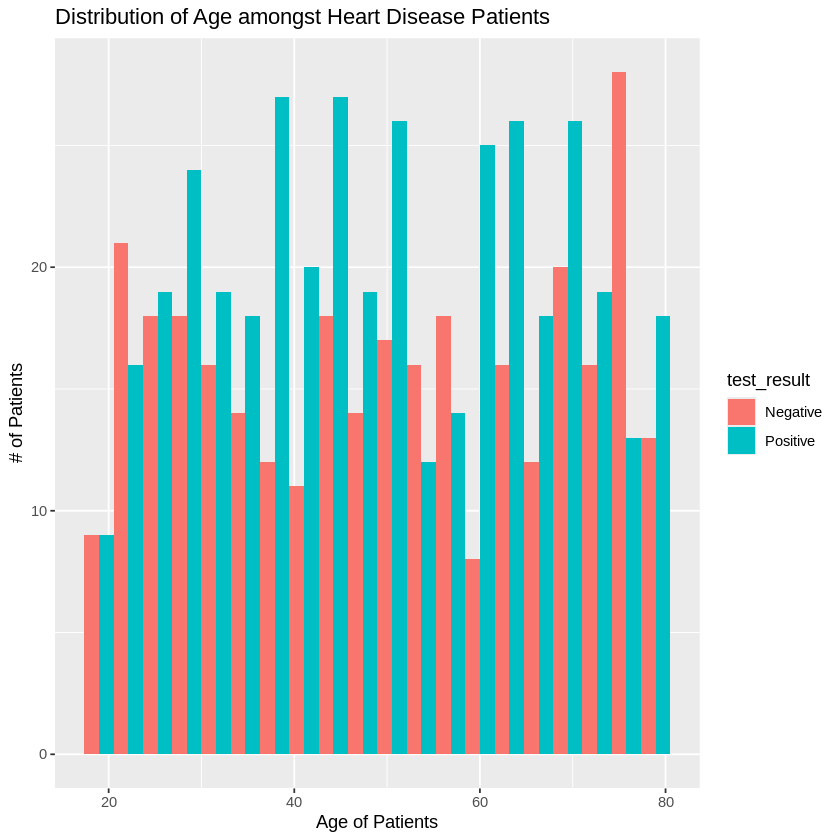

In [9]:
age_hist <- heart_disease_train |> 
    ggplot(aes(x = age, fill = test_result)) + 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Age of Patients", y = "# of Patients", color = "Test Result", title = "Distribution of Age amongst Heart Disease Patients")


bp_hist <- heart_disease_train |> 
    ggplot(aes(x = restingBP, fill = test_result))+ 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Resting Blood Pressure (mm HG)", y = "# of Patients", color = "Test Result", title = "Distribution of Resting Blood Pressure amongst Heart Disease Patients")


heartrate_hist <- heart_disease_train |> 
    ggplot(aes(x = maxheartrate, fill = test_result))+ 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Max Heart Rate (BPM) ", y = "# of Patients", color = "Test Result", title = "Distribution of Resting Max Heart Rate amongst Heart Disease Patients")

chol_hist <- heart_disease_train |> 
    ggplot(aes(x = serumcholestrol, fill = test_result))+ 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Cholesterol Level (mg/dL)", y = "# of Patients", color = "Test Result", title = "Distribution of Serum Cholesterol Level amongst Heart Disease Patients")


age_hist

**Figure 4:** Distribution of Age Amongst Heart Disease Patients

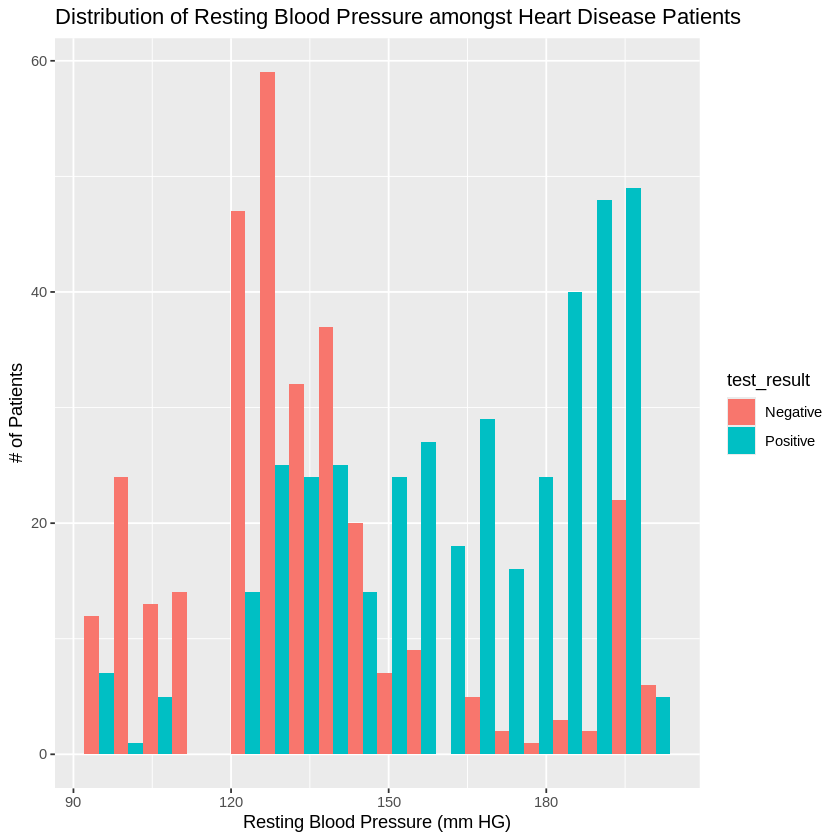

In [10]:
bp_hist

**Figure 5:** Distribution of Resting Blood Pressure Amongst Heart Disease Patients

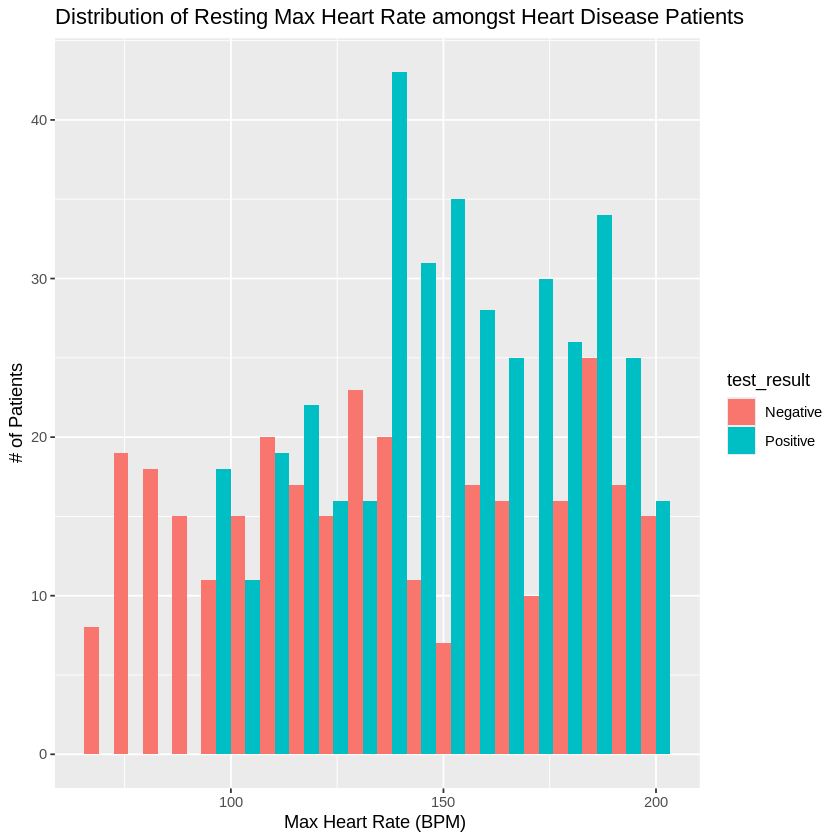

In [11]:
heartrate_hist

**Figure 6:** Distribution of Max Heart Rate Amongst Heart Disease Patients

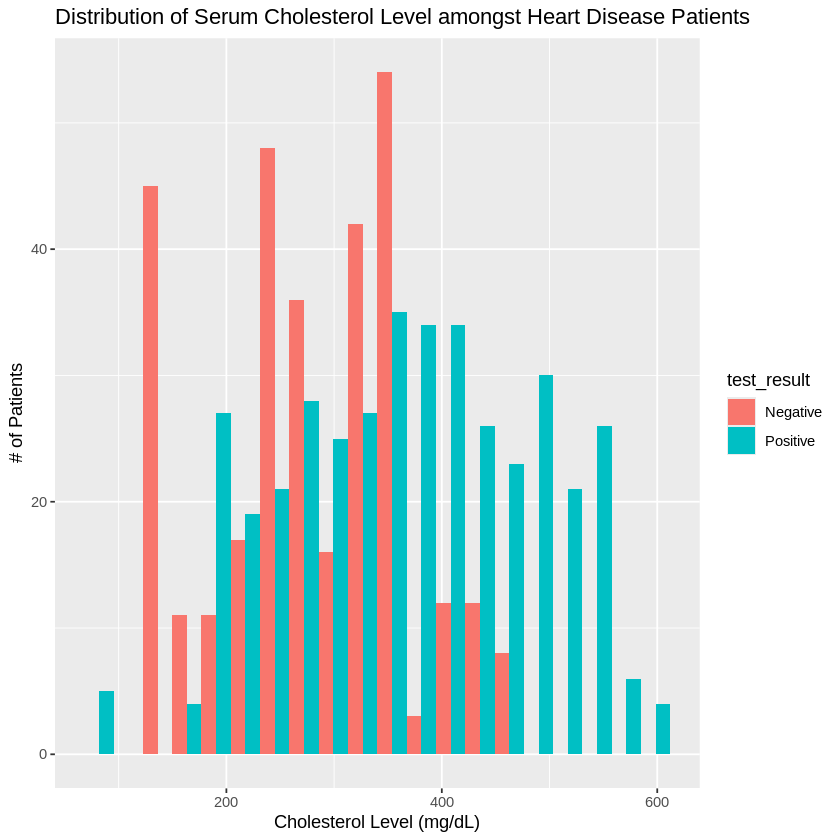

In [12]:
chol_hist

**Figure 7:** Distribution of Cholesterol Level Amongst Heart Disease Patients

We will compute a summary table, sepearting the data into two groups (Positive and Negative group), and calculating the mean value of all predictors of the groups. 

In [15]:
summary_table <- heart_disease_train |> 
    group_by(test_result) |> 
    summarize(avg_age = mean(age, na.rm = TRUE), 
              avg_chol = mean(serumcholestrol, na.rm = TRUE),
              avg_bp = mean(restingBP, na.rm = TRUE), 
              avg_maxhr = mean(maxheartrate, na.rm = TRUE))

summary_table 

test_result,avg_age,avg_chol,avg_bp,avg_maxhr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,49.91111,278.9841,134.6095,135.7841
Positive,49.52911,370.0557,163.7570,152.3975


**Figure 8:** Summary Table of average statistics between the Negative and the Positive group 

Figure 0.5 provides the mean values of our predictors for the two groups of patients. It can be seen that the positive test result group reported a higher average cholestrol level, higher average resting blood pressure, and a higher average maximum heart rate. The average age between the two groups were about the same. 

## Methods 

To perform our research, we will be using the classification method learned in class. We will be using four different predictors (age, cholestrol level, resting blood pressure, and maximum heart rate) to predict a new patient's final test result. Before we do any classification procedures, we will scale all the predictors so that all of the factors have an "even say" during the classification process. Without this step, the age variable will get overshadowed by the other predictors due to its lower range of values. After the scaling procedure, we can then create scatter plots, comparing the different predictors on even footing, and coloring the scatter plots accordingly to the obesrvation's test result. A correct implementation of scaling and plotting will allow us to use the K-nearest neighbors classification algorithm to predict the test result of a new patient. 

## Expected outcomes and significance:


From our preliminary exploratory data analysis and also our pre-existing knowledge about heart disease, we expect patients that are older to have a higher chance of being diagnosed with heart disease. On top of that, our preliminary data analysis showed us that patients with a higher resting blood pressure (above 150 mmHG), higher maximum heart rate (above 150 bpm) and a higher chlesterol level (above 400 mg/dL) are more likely to be diagnosed with a positive heart disease check. 

If our expected outcome eventually meets with the statistical data, such findings will facilitate medical workers to better diagnose patients with heart diseases. They will be able to diagnose patients more accurately and efficiently based on the four different factors that we used.

The outcome of our research could pose further questions about habits that could lead to maintaining a healthy life style to prevent heart disease. Examples of such questions could be : 

- How does one maintain a lower maximum heart rate? Does nutrition play any part in this?
- What are some healthy habits that could lead to a lower choelstrol level.
- What actions/activities are recommended to older people in order to decrease the likelihood of having heart disease?

It could also raise a set of more scientific and medical questions, such as : 

- Which predictor has the strongest correlation between heart disease and itself?
- What other factors could increase the likelihood of heart disease?
- What is so different between younger and older people that increase the likelihood of heart disease? 


## PREPARING THE MODEL ## 

In order to conduct our data classification using the K-Nearest Neighbour algorithm, we must first create a recipe and a model. As we saw from figures 0.1, 0.2, 0.3 and 0.4, the variables have different range of values, with some variables having a much wider range compared to others. In the K-Nearest Neighbour algorithm, values with a wider range have a higher "voting power". Since we want to treat all the variables with equal importance, we must scale and center all of our predictors. 

As we do not yet know the best "k" value to use for our classification, we will set `neighbors` as `tune()` in our model. 

In [16]:
# Creating the engine 
knn_recipe <- recipe(test_result ~. , data = heart_disease_train) |> 
    step_scale(all_predictors()) |> 
    step_center(all_predictors()) 

# Creating the model 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification") 

knn_recipe 
knn_spec 



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 4



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We will be conducting cross-validation using the `vfold_cv()` function and setting the `strata` as `test_result` and `v` as 5. Since we do not yet know the k-value that yields the best accuracy, we will create a tibble containing values from 1 to 50. By using this in during our `fitting` process, we can use the `collect_metrics()` function in order to get the accuracy of each k value from 1 to 50. 

In [17]:
set.seed(1) 

k_vals <- tibble(neighbors = 1:100) 

training_vfold <- vfold_cv(heart_disease_train, v = 5, strata = test_result) 

knn_fit <- workflow() |> 
    add_recipe(knn_recipe) |> 
    add_model(knn_spec) |> 
    tune_grid(resamples = training_vfold, grid = k_vals) |> 
    collect_metrics() 

kvals_accuracy <- knn_fit |> 
    filter(.metric == "accuracy") 

head(kvals_accuracy)  


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7380282,5,0.01432887,Preprocessor1_Model001
2,accuracy,binary,0.7380282,5,0.01432887,Preprocessor1_Model002
3,accuracy,binary,0.7661972,5,0.01657550,Preprocessor1_Model003
4,accuracy,binary,0.7661972,5,0.01657550,Preprocessor1_Model004
5,accuracy,binary,0.7774648,5,0.01401391,Preprocessor1_Model005
6,accuracy,binary,0.7774648,5,0.01401391,Preprocessor1_Model006


[1] "Table 1.0 : Table showing the accuracy values of the different K values from 1 to 100"


**Figure 9** : Sample of table showing the accuracy values of different K-values from 1 to 100 

Using Figure 9, we can plot the accuracy values in a scatter plot, which will visualize the accuracy values of the different k-values. We can then select the first one with the highest accuracy value to be used in our model.  

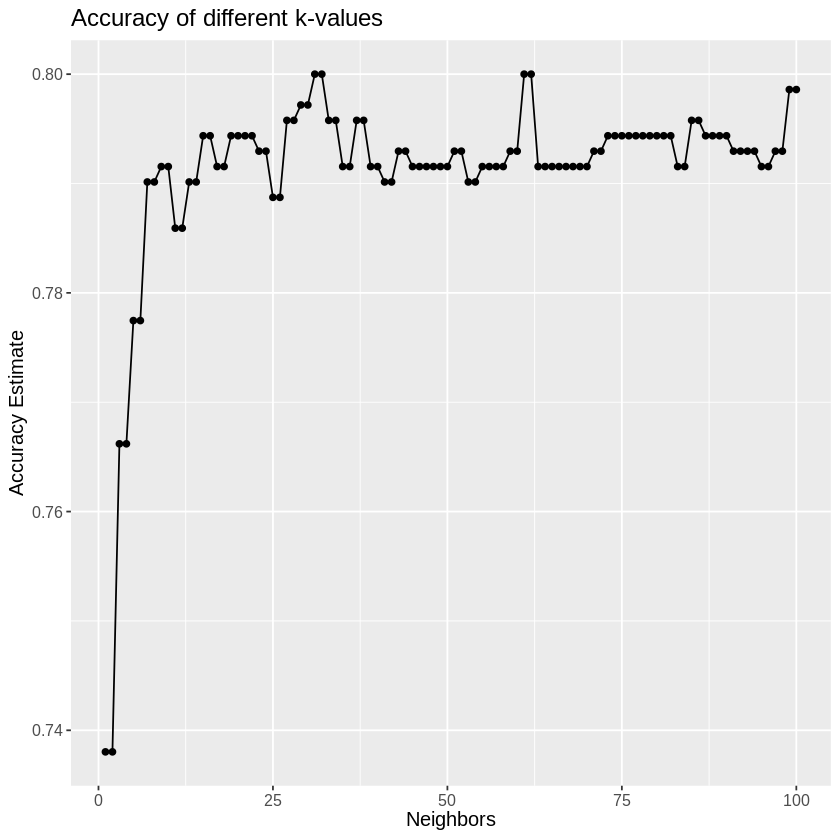

In [19]:
accuracy_plot <- ggplot(kvals_accuracy, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  ggtitle("Accuracy of different k-values") + 
  theme(text = element_text(size = 12)) 

best_k <- kvals_accuracy |> 
    filter(mean == (max(mean))) |> 
    slice_min(neighbors) |> 
    pull(neighbors) 

accuracy_plot

**Figure 10:** Plot showing the accuracy estimates for the different k-values from 1 : 100

We will be using the first k-value that yields the highest accuracy estimate, which in this case, turns out to be k = 31. 

Since we now have our best k-value, we can use this value when creating our model. 

In [20]:
knn_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |> 
    set_engine("kknn") |> 
    set_mode("classification") 

knn_best_fit <- workflow() |> 
    add_recipe(knn_recipe) |> 
    add_model(knn_spec_best) |> 
    fit(data = heart_disease_train)

knn_best_fit 

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(31L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2070423
Best kernel: rectangular
Best k: 31

Now that we have built our prediction model to use our best "k-value", we can now use it to form predictions on our testing data. 

## IMPLEMENTING THE MODEL TO TESTING DATA SET ## 

We will conduct our predictions using the `predict()` function and passing the `heart_disease_test` data set as its parameter alongside the model that we have built. We will then use `bind_cols()` to add the predictions into our testing data set. 

In [21]:
predictions <- predict(knn_best_fit, heart_disease_test) |> 
    bind_cols(heart_disease_test) 

head(predictions)  
print("Table 2.0 : First 6 rows of the data table including the predictions made by the model") 

.pred_class,age,serumcholestrol,restingBP,maxheartrate,test_result
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Negative,59,209,98,117,Negative
Positive,58,354,170,170,Negative
Positive,65,247,200,194,Negative
Negative,35,269,127,87,Negative
Negative,24,164,136,91,Negative
Positive,59,223,156,184,Positive


[1] "Table 2.0 : First 6 rows of the data table including the predictions made by the model"


**Figure 11** : Sample of the testing data set, including the predictions made by the model. 

We will create four separate scatter plots to view our predictions. One version where `age` is two the x-axis with `serumcholesterol` on the y-axis, and one with `restingBP` on the x-axis and the `maxheartrate` on the y-axis. Both versions of the plots will contain one variation coloured by the prediction made from the model, and one colourd by the acutal diagnosis. This would give us a visual idea of how well our model is doing predicting the results compared to the real diagsnosis. 

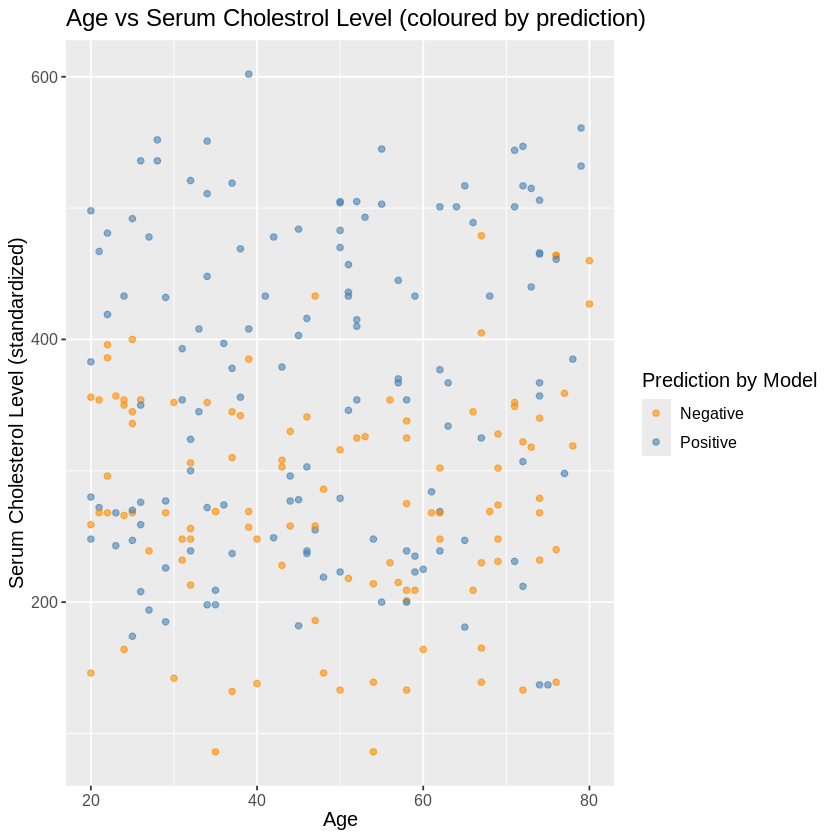

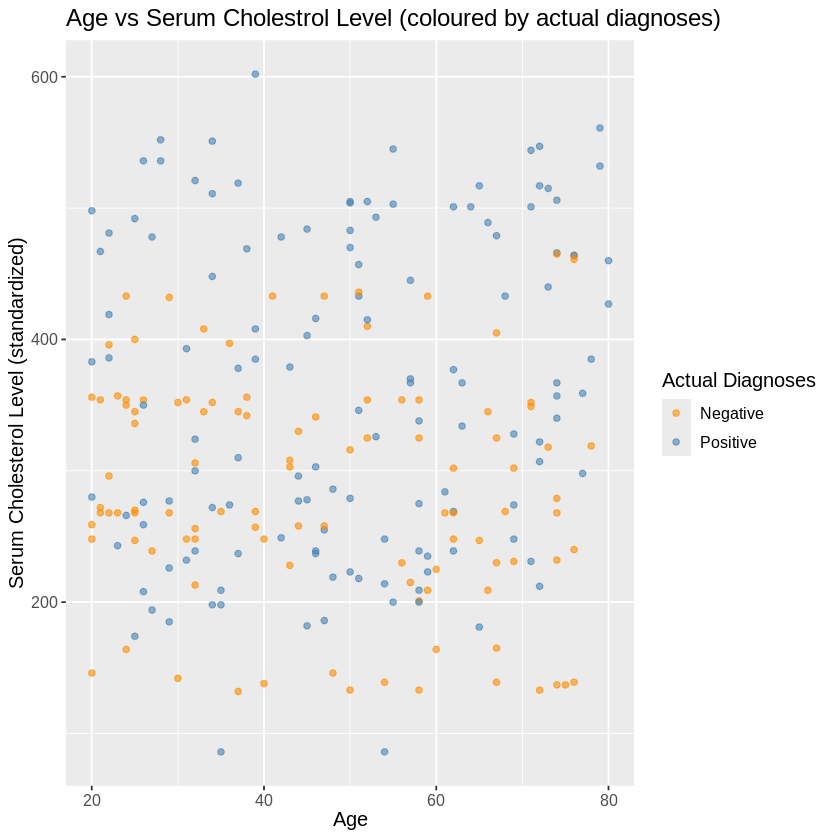

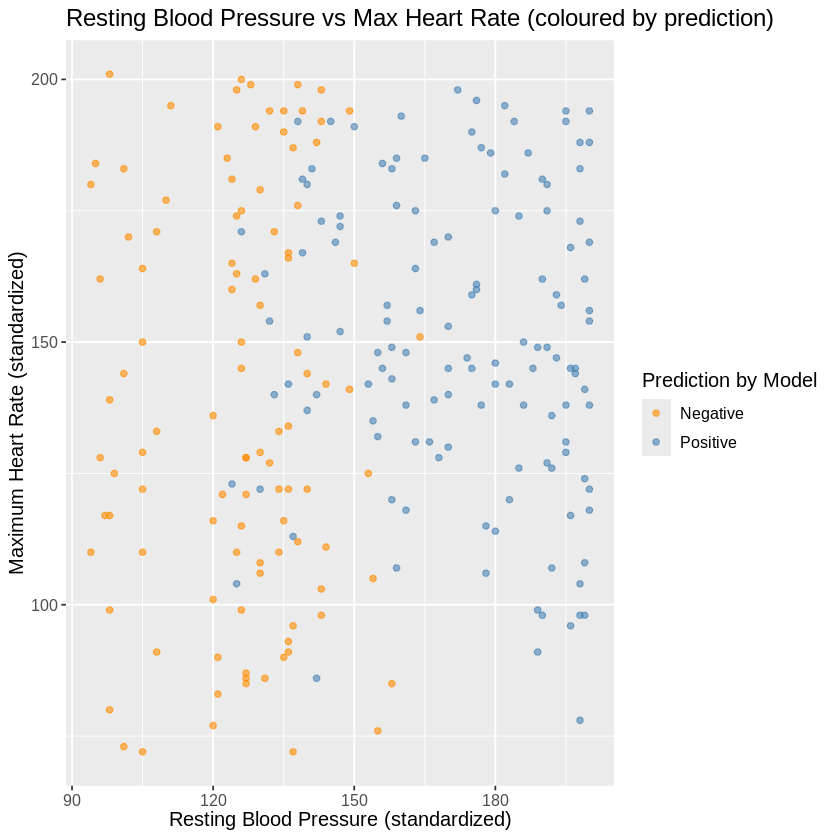

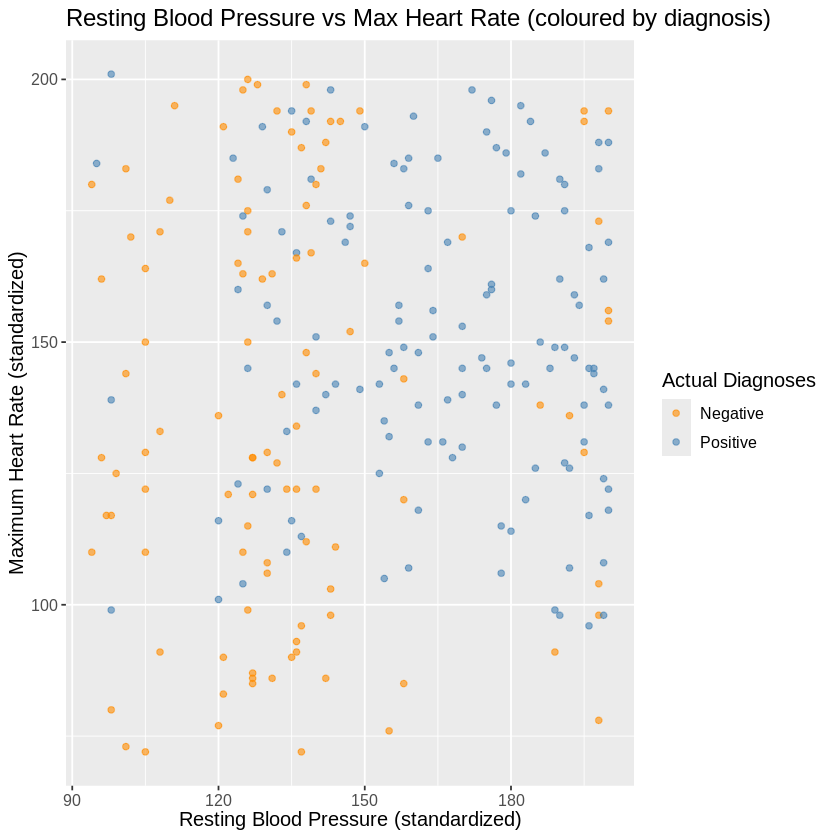

In [22]:
age_serum_plot_pred <- predictions |>
  ggplot(aes(x = age, y = serumcholestrol, color = .pred_class)) +
  geom_point(alpha = 0.6) +
  labs(x = "Age",
       y = "Serum Cholesterol Level (standardized)",
       color = "Prediction by Model") +
  ggtitle("Age vs Serum Cholestrol Level (coloured by prediction)") +  
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12))

age_serum_plot_actual <- predictions |>
  ggplot(aes(x = age, y = serumcholestrol, color = test_result)) +
  geom_point(alpha = 0.6) +
  labs(x = "Age",
       y = "Serum Cholesterol Level (standardized)",
       color = "Actual Diagnoses") +
  ggtitle("Age vs Serum Cholestrol Level (coloured by actual diagnoses)") +  
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12))


bp_heartrate_plot <- predictions |>
  ggplot(aes(x = restingBP, y = maxheartrate, color = .pred_class)) +
  geom_point(alpha = 0.6) +
  labs(x = "Resting Blood Pressure (standardized)",
       y = "Maximum Heart Rate (standardized)",
       color = "Prediction by Model") +
  ggtitle("Resting Blood Pressure vs Max Heart Rate (coloured by prediction)") +  
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12))

bp_heartrate_plot_actual <- predictions |>
  ggplot(aes(x = restingBP, y = maxheartrate, color = test_result)) +
  geom_point(alpha = 0.6) +
  labs(x = "Resting Blood Pressure (standardized)",
       y = "Maximum Heart Rate (standardized)",
       color = "Actual Diagnoses") +
  ggtitle("Resting Blood Pressure vs Max Heart Rate (coloured by diagnosis)") +  
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12))


age_serum_plot_pred 
age_serum_plot_actual

bp_heartrate_plot
bp_heartrate_plot_actual

**Figure 12&13:** Age vs Serum Cholesterol Level, coloured by prediction from model and diagnosis respectively.

**Figure 14&15:** Resting Blood Pressure vs Maximum Heart Rate, coloured by prediction from model and diagnosis respectively. 

Just by looking at the graphs, it seems that our model is performing pretty good, as both plots are pretty similar in terms of the colouring of each data point. However, we are unable to fully determine the effectiveness and accuracy of our model by just looking at the plots. To do this, we will use the `metrics()` function which returns our models accuracy metrices. Our `truth` value would be `test_result` and our `estimate` will be `.pred_class`. 

In [24]:
prediction_accuracy <- metrics(predictions, truth = test_result, estimate = .pred_class) 
prediction_accuracy 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7890295
kap,binary,0.5725108


**Figure 16** : Accuracy Metrices of the prediction model. 

The accuracy for our model comes out to be 78.90%. To see how whether this `accuracy` level is satisfactory, we will compare it to the majority predictor, which will predict everything to be whichever test result is more prevalent in the data set. 

In [27]:
majority <- heart_disease_train |> 
    group_by(test_result) |> 
    summarize(n = n()) |> 
    mutate(percent = 100*n/nrow(heart_disease_train)) 

majority 

test_result,n,percent
<fct>,<int>,<dbl>
Negative,315,44.3662
Positive,395,55.6338


Our majority predictor model has a 55.63% accuracy level. The 78.90% of the model that we built is much better, showing us that it is worthwile to use our model. 

To further analyze our model, we will create a confusion matrix, with the following critera: 

- **True Positive** : A positive heart disease diagnosis that has been correctly classified as positive by the model. 
- **False Positive** : A negative heart disease diagnosis that has been incorrectly classified as positive by the model.
- **True Negative** : A negative heart disease diagnosis that has been correctly classified as negative by the model.
- **False Negative** : A postiive heart disease diagnosis that has been incorrectly classified as negative by the model. 

In [28]:
confusion_matrix <- predictions |> 
    conf_mat(truth = test_result, estimate = .pred_class)

confusion_matrix

print("Table 2.2 : The confusion matrix of the built model") 

          Truth
Prediction Negative Positive
  Negative       80       25
  Positive       25      107

[1] "Table 2.2 : The confusion matrix of the built model"


From the confusion matrix above, we can see that our model correctly classified 108 of the positive heart disease diagnosis and correctly classified 77 of the negative heart disease diagnosis. We can now compute the precision and the recall statistics of our model. 

**Accuracy** = (# of correct predictions) / (total # of predictions) = (107+80) / (107 + 80 + 25 + 25) = 0.7890 = 78.90% 

**Precision** = (# of correct positive predictions) / (total # of positive predictions by model) = 107 / (107+25) = 0.8106 = 81.06% 

**Recall** = (# of correct positive predictions) / (total # of positive test set observations) = 107 / (107+25) = 0.8106 = 81.06% 

The stats are very promising for our model. Our model has a 78.9% accuracy, and 81.06% for both precision and recall. 

## DISCUSSION 

**SUMMARY** 

According to our data analysis, we found that resting blood pressure, maximum heart rate, and cholesterol level all appear to have positive correlations with the chance of having heart disease among the population. More specifically, through analysis of our data, we were able to find out that those who experience a high level of resting blood pressure, maximum heart rate, and high cholesterol level are more prone to heart disease than those who do not. As for the age of individuals in the population, we cannot conclude from our classification model that it has any potential relationship with the chance of having heart diseases.

As for our prediction model, our model had an accuracy of 78.90%, and recorded 81.06% for both precision and recall. Since our model is built to identify potential heart diseases, we want to correctly diagnose as many positive cases as possible. Due to this context, we will want our model to have a high `recall` value, since a high recall value means that if there is a positive case in our data set, we can trust our model to correctly identify it. A low recall in our context could be detrimental, as an undiagnosed heart disease can have severe repercussions down the line, as the patient will go without receiving proper treatment. Although 81.06% isn't the best we can hope for, this is a very promising value for a model that is at its early stage of development, with plenty of room to improve if further resources are dedicated to it.

**EXPECTATIONS VS REALITY**

Overall, our findings fell in line with what we expected to find prior to conducting a full data analysis. Recalling from the hypothesis from our proposal, and the analysis of `Figure 8`, we were expecting to find a correlation between a high resting blood pressure, high maximum heart rate and high cholestrol level and the presence of heart disease, and that is exactly what we found. Prior to conducting our data analysis, we predicted that age would also be a likely factor in the presence of heart disease. However, we were unable to find any positive correlation between the two. However, this also falls in line with the data from `Figure 8`, which shows that the mean age betweeen the groups were pretty much identical, so it could be that our hypothesis was wrong to begin with, and not that our model did a poor job. 

**IMPACTS**

In conclusion, these insights from our data analysis can greatly impact early detection and prevention efforts. Healthcare providers can leverage this knowledge to identify individuals at higher risk of heart disease, enabling early interventions and preventive measures to mitigate risk factors. By pinpointing specific risk factors, healthcare professionals can develop personalized treatment plans that address individual needs and vulnerabilities.

**FUTURE QUESTIONS**

Our findings could lead to future research questions such as: 
- How do lifestyle factors (e.g., diet, exercise) affect blood pressure, heart rate, and cholesterol levels to influence heart disease risk of individuals? 
- Are there any distinct pattern of these health indicators across different age groups or ethnicities? 
- How can predictive models incorporating genetic data enhance the classifier to identify heart disease? 
- What interventions are most effective in reducing heart disease incidence based on these risk factors?




## Bibliography

CDC. “Coronary Artery Disease | Cdc.gov.” Centers for Disease Control and Prevention, 19 July 2021, www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=Print-.

Doppala, Bhanu Prakash; Bhattacharyya, Debnath (2021), “Cardiovascular_Disease_Dataset”, Mendeley Data, V1, doi: 10.17632/dzz48mvjht.1